In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import statsmodels.api as sm
import time

[*********************100%***********************]  1 of 1 completed
Time taken to download the data and plot returns: 0.2939751148223877


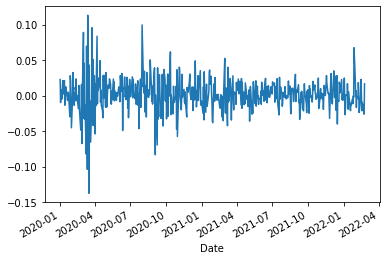

In [51]:
start1 = time.time()
apple = yf.download("AAPL", start = "2020-1-1", end = "2022-2-28")
St = apple['Adj Close']
initial_price = St[-1]
returns = St.pct_change()
ln_returns = np.log(1+ returns)
log_returns = ln_returns[1:543]
log_returns.plot()
end1 = time.time()

print('Time taken to download the data and plot returns:', end1-start1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544 entries, 2019-12-31 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       544 non-null    float64
 1   High       544 non-null    float64
 2   Low        544 non-null    float64
 3   Close      544 non-null    float64
 4   Adj Close  544 non-null    float64
 5   Volume     544 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 29.8 KB


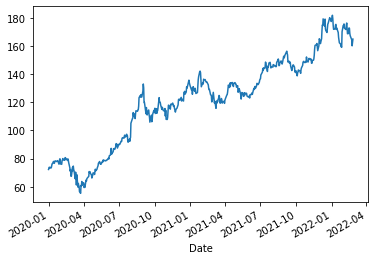

In [4]:
St.plot()
apple.info()

In [53]:
M = 100000
N = 126
nudt = 0 # assuming that only movement of the stock comes from innovation terms
volsdt = log_returns.std()
avg = log_returns.mean() #the assumption of 0 was made because the mean here returns value close to 0
print('The average is:',avg, 'and the standard deviation is:', volsdt)
lnS = np.log(initial_price)

The average is: 0.001498298573613268 and the standard deviation is: 0.023318758684889532


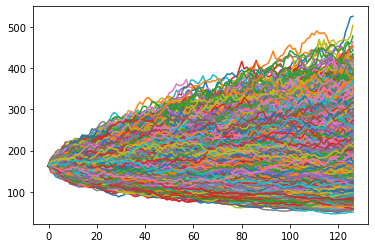

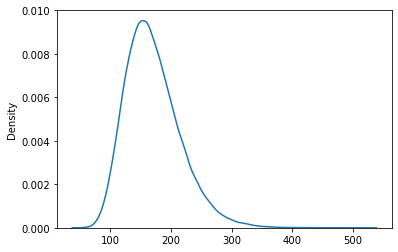

In [17]:
start21 = time.time()
np.random.seed(100)
Z = np.random.normal(size=(N, M))
end_prng = time.time()
delta_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )
ST = np.exp(lnSt)
plt.plot(ST)
plt.show()
final_day = ST[-1]
sns.kdeplot(final_day)


end21 = time.time()


In [55]:
print ('The time taken by benchmark simulation is:',end21-start21, 'of which the time taken to generate random number is:', end_prng-start21)

The time taken by benchmark simulation is: 56.23964309692383 of which the time taken to generate random number is: 0.30716991424560547


In [57]:

mean0 = final_day.mean()
se0 = final_day.std()
print('The average is:',mean0,'and the standard deviation is:',se0, 'The number of simulation:',len(final_day))

print('The maximum is:',final_day.max(),'and the minimum is', final_day.min())
skew0 = stats.skew(final_day)
kurtosis0 = stats.kurtosis(final_day)
print('The skewness is :',skew0,'and the kurtosis is:', kurtosis0)
from sklearn.metrics import mean_squared_error
y_true = np.random.normal(mean0,se0, size = 100000)
y_pred = final_day


y1 = np.sort(y_true)
y2 = np.sort(y_pred)
mse1 = mean_squared_error(y1, y2)
rmse1 = mean_squared_error(y1, y2, squared = False)
print('The mean squared error is:', mse1, 'and the root mean squared error is:', rmse1)


import numpy as np 
from scipy.stats import t

x =final_day

m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))

print('The 95 % CI is (',m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)), ')') 



The average is: 170.51234801997282 and the standard deviation is: 45.362131887812 The number of simulation: 100000
The maximum is: 525.3542886291667 and the minimum is 50.82016815969881
The skewness is : 0.8013715097339654 and the kurtosis is: 1.1357691182733651
The mean squared error is: 66.74462501868288 and the root mean squared error is: 8.169738369047254
The 95 % CI is ( 170.23119237694272 170.79350366300292 )


In [15]:
stats.kstest(y2, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [14]:
stats.anderson(y2)

AndersonResult(statistic=659.5093231331848, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

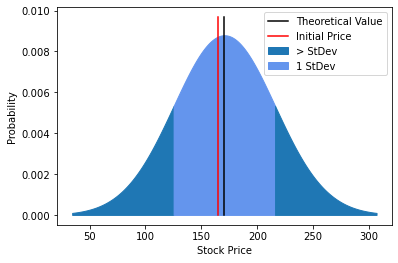

In [15]:
x1 = np.linspace(mean0-3*se0, mean0-1*se0, 100)
x2 = np.linspace(mean0-1*se0,mean0+1*se0,100)
x3 = np.linspace(mean0+1*se0,mean0+3*se0,100)

s1 = stats.norm.pdf(x1, mean0, se0) 
s2 = stats.norm.pdf(x2, mean0, se0)
s3 = stats.norm.pdf(x3, mean0, se0)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev') 
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x3, s3, color='tab:blue') 

plt.plot([mean0,mean0],[0, max(s2)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value 
plt.plot([initial_price,initial_price],[0, max(s2)*1.1], 'r', label='Initial Price') # red line plots the initial price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot


Now, Let's observe the effect of decreased number of simulations. One can simply extract the first n simulations from the ST matrix above. I don't. There would be bias in computational time calculation if I simply extracted first n columns. That being said, I am extracting the random numbers. So, the bias still exists. Entire generation of random number took only 0.307 second, so 10% of that is 0.0307 second. 



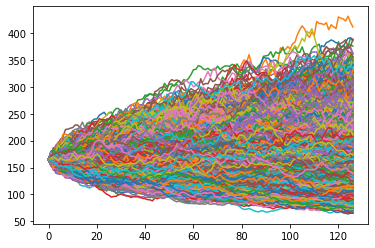

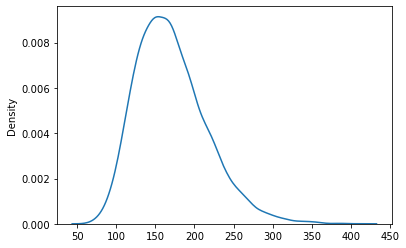

In [19]:
start3 = time.time()
Z1 = Z[:, :10000]
M1 = 10000
delta_lnSt1 = nudt + volsdt*Z1
lnSt1 = lnS + np.cumsum(delta_lnSt1, axis=0)
lnSt1 = np.concatenate( (np.full(shape=(1, M1), fill_value=lnS), lnSt1) )
ST1 = np.exp(lnSt1)
plt.plot(ST1)
plt.show()
final_day1 = ST1[-1]
sns.kdeplot(final_day1)
end3 = time.time()


In [59]:
print('The computational time in seconds is:',end3-start3)

The computational time in seconds is: 7.60149884223938


In [62]:
mean01 = final_day1.mean()
se01 = final_day1.std()
print('The average is:',mean01,', the standard deviation is:',se01,'. There number of simulations are:', len(final_day1))
skew1 = stats.skew(final_day1)
kurtosis1 = stats.kurtosis(final_day1)
print('The skewness is:',skew1,'and the kurtosis is:', kurtosis1)
print('The maximum value from the simulation is:',final_day1.max(),'and the minimum value is',final_day1.min())

y1_true = np.random.normal(mean01,se01, size = 10000)
y1_pred = final_day1


mse1= mean_squared_error(np.sort(y1_true), np.sort(y1_pred))
rmse1 = mean_squared_error(np.sort(y1_true), np.sort(y1_pred), squared = False)
print('The mean squared error is:',mse1, 'and the root mean squared error is:', rmse1)

x1 =final_day1
m1 = x1.mean() 
s1 = x1.std() 
dof1 = len(x1)-1 
confidence = 0.95

t_crit1 = np.abs(t.ppf((1-confidence)/2,dof1))

print('The 95% confidence interval is:(', m1-s1*t_crit1/np.sqrt(len(x1)), m1+s1*t_crit1/np.sqrt(len(x1)), ')') 



The average is: 170.50998963348516 , the standard deviation is: 45.369724017499315 . There number of simulations are: 10000
The skewness is: 0.753506144795728 and the kurtosis is: 0.827661266684649
The maximum value from the simulation is: 411.37850735095543 and the minimum value is 65.02756527921659
The mean squared error is: 55.95241853737593 and the root mean squared error is: 7.480134927752034
The 95% confidence interval is:( 169.62065172999263 171.3993275369777 )


In [24]:
stats.anderson(final_day1)

AndersonResult(statistic=64.06371100659089, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [25]:
stats.kstest(final_day1, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

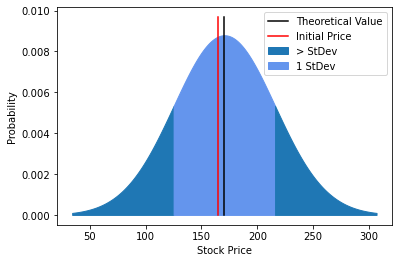

In [23]:
x11 = np.linspace(mean01-3*se01, mean01-1*se01, 100)
x21 = np.linspace(mean01-1*se01,mean01+1*se01,100)
x31 = np.linspace(mean01+1*se01,mean01+3*se01,100)

s11 = stats.norm.pdf(x11, mean01, se01) 
s21 = stats.norm.pdf(x21, mean01, se01)
s31 = stats.norm.pdf(x31, mean01, se01)

plt.fill_between(x11, s11, color='tab:blue',label='> StDev') 
plt.fill_between(x21, s21, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x31, s31, color='tab:blue') 

plt.plot([mean01,mean01],[0, max(s21)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s21)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot

#Now, moving on to 1000 simulation. 

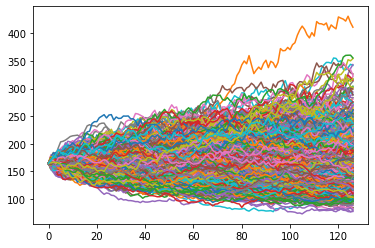

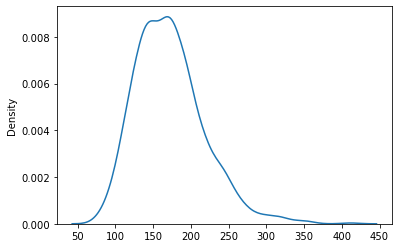

In [26]:
start4 = time.time()
Z11 = Z[:, :1000]
delta_lnSt11 = nudt + volsdt*Z11
lnSt11 = lnS + np.cumsum(delta_lnSt11, axis=0)
lnSt11 = np.concatenate( (np.full(shape=(1, 1000), fill_value=lnS), lnSt11) )
ST11 = np.exp(lnSt11)
plt.plot(ST11)
plt.show()
final_day11 = ST11[-1]
sns.kdeplot(final_day11)
end4 = time.time()



In [63]:
print('The computational time is:',end4-start4)

The computational time is: 0.858942985534668


In [64]:
mean011 = final_day11.mean()
se011 = final_day11.std()
print('The mean is:',mean011,'and the standard deviation is',se011,'The number of simulations are:', len(final_day11))

print('The maximum simulated price is:',final_day11.max(),'and the minimum simulated price is:', final_day11.min())
skew11 = stats.skew(final_day11)
kurtosis11 = stats.kurtosis(final_day11)
print('The skewness is:',skew11, 'and the kurtosis is:', kurtosis11)

y2_true = np.random.normal(mean011,se011, size = 1000)
y2_pred = final_day11

mse2= mean_squared_error(np.sort(y2_true), np.sort(y2_pred))
rmse2 = mean_squared_error(np.sort(y2_true), np.sort(y2_pred), squared = False)
print('The mean squared error is:',mse2,'and the root mean squared error is:', rmse2)

m11 = final_day11.mean() 
s11 = final_day11.std() 
dof11 = len(final_day11)-1 
confidence = 0.95

t_crit11 = np.abs(t.ppf((1-confidence)/2,dof11))

print('The 95% CI is:(',m11-s11*t_crit11/np.sqrt(len(x11)), m11+s11*t_crit11/np.sqrt(len(x11)),')') 



The mean is: 171.94099070992473 and the standard deviation is 45.848731574722386 The number of simulations are: 1000
The maximum simulated price is: 411.37850735095543 and the minimum simulated price is: 77.4887340356588
The skewness is: 0.8890571213196133 and the kurtosis is: 1.4739802316873636
The mean squared error is: 106.50337489176611 and the root mean squared error is: 10.320047233020114
The 95% CI is:( 162.94390401897914 180.93807740087033 )


In [ ]:
stats.kstest(final_day11, 'norm')

In [ ]:
stats.anderson(final_day11)

I just showed you the impact of changing the number of simulation in the results of the monte carlo simulation. Let me check the impact of having a different random number generator. Lagged fibonacci generator will generate uniform random number.

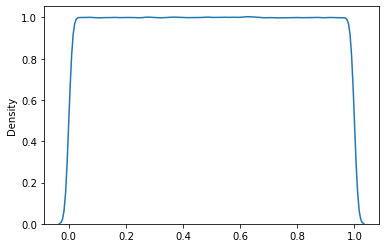

In [30]:
#Lagged Fibonacci Generator For Uniform Random Numbers
start51 = time.time()
# parameter settings
nn   = 18
a    = 1366
b    = 150889
M    = 714025
seed = 123456
n    = 12600000 + 1
yy = []
yy.append(seed)   
i    = 1

# Main computation
while i <= nn:
    yy.append( (a * yy[i - 1] + b) % M)
    i  = i + 1

y = [x / M for x in yy]
i=19

while i <= n + 18:
    zeta = y[i - 12] - y[i - 5]
    if zeta < 0:
        zeta = zeta + 1
    
    y.append(zeta)
    i = i + 1

U3   = y[19:n + 18]
n1  = n - 2
n2  = n - 1

sns.kdeplot(U3) 

end51 = time.time()

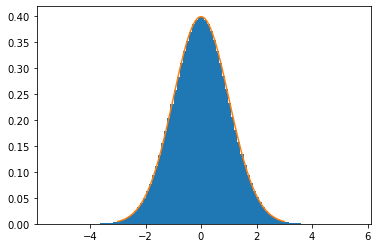

In [31]:
#Box Müller Method _ Youtube channel StatMonteCarlo

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt
start52 = time.time()
def fcos(theta, E):
  #return [np.cos(theta), np.sin(theta)] * np.sqrt(2*E)
  return np.cos(theta) * np.sqrt(2*E)
  

def BoxMuller(N, mu = 0, sigma = 1 ):
  out = np.zeros(N)
  for j in range(N):
    #theta = rd.uniform(low = 0, high = 2*np.pi, size = 1)
    theta = 2*np.pi * U3[j]
    E = rd.exponential(scale = 1/1, size = 1)
    Y = fcos(theta,E)
    out[j] = mu + Y* sigma
  return out
plt.figure()
Y = BoxMuller(12600000)
plt.hist(Y, bins=100, density=True)
xd=np.linspace(-3,3,100)
plt.plot(xd,stats.norm.pdf(xd))
Norm1 = Y
end52 = time.time()
#for distribution with mean unequal to 0 and sigma unequal to 1, run the phi module
#and use the following code to plot the outline instead for mean 5 and sigma 2
#plt.plot(xd,phi(xd,5,2))

#characteristics function for arbitrary mu and sigma for normal distribution

#def phi(X, mu, sigma):
#  return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

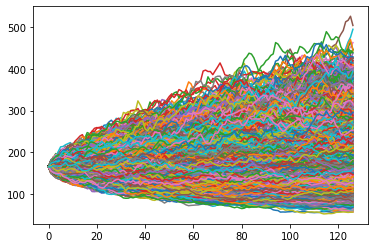

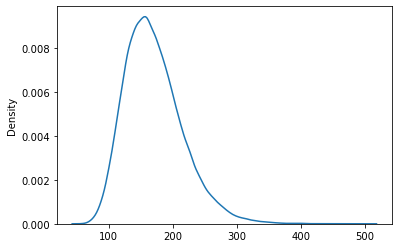

In [32]:
start53 = time.time()
M2 = 100000
N2 = 126
Z2 = np.reshape(Norm1, (N2,M2))
delta_lnSt2 = nudt + volsdt*Z2
lnSt2 = lnS + np.cumsum(delta_lnSt2, axis=0)
lnSt2 = np.concatenate( (np.full(shape=(1, M2), fill_value=lnS), lnSt2 ) )
ST2 = np.exp(lnSt2)
plt.plot(ST2)
plt.show()
final_day2 = ST2[-1]
sns.kdeplot(final_day2)
end53 = time.time()


In [67]:
mean02 = final_day2.mean()
se02 = final_day2.std()
print('The mean of the price series is:',mean02, 'and the standard deviation is:',se02)

skew21 = stats.skew(final_day2)
kurtosis21 = stats.kurtosis(final_day2)
print('The skewness is:',skew21,'and the kurtosis is', kurtosis21)

print('The maximum value for the price series is:',final_day2.max(),'and the minimum value is:', final_day2.min())


y3_true = np.random.normal(mean02,se02, size = 100000)
y3_pred = final_day2

mse3= mean_squared_error(np.sort(y3_true), np.sort(y3_pred))
rmse3 = mean_squared_error(np.sort(y3_true), np.sort(y3_pred), squared = False)
print('The mean squared error is:',mse3, 'and the root mean squared error is:', rmse3)

x2 =final_day2

m2 = x2.mean() 
s2 = x2.std() 
dof2 = len(x2)-1 
confidence = 0.95

t_crit2 = np.abs(t.ppf((1-confidence)/2,dof2))

print('The 95% CI is: (',m2-s2*t_crit2/np.sqrt(len(x2)), m2+s2*t_crit2/np.sqrt(len(x2)),')') 

The mean of the price series is: 170.3878612788836 and the standard deviation is: 45.328973518942895
The skewness is: 0.8043890277417789 and the kurtosis is 1.1646290094397393
The maximum value for the price series is: 504.74878330223413 and the minimum value is: 56.25319884595445
The mean squared error is: 68.99363656290498 and the root mean squared error is: 8.306240820184843
The 95% CI is: ( 170.10691115226408 170.66881140550313 )


In [72]:
print('The total computational time in seconds is:',end51-start51+end52-start52+end53-start53)
print('The uniform random number generation took:', end51-start51,'seconds. The Box-Mueller conversion took:',end52-start52,'seconds and the simulation took:',end53-start53, 'seconds') 

The total computational time in seconds is: 197.78363847732544
The uniform random number generation took: 27.47975516319275 seconds. The Box-Mueller conversion took: 109.86919713020325 seconds and the simulation took: 60.43468618392944 seconds


In [ ]:
stats.kstest(np.sort(final_day2), 'norm')


In [ ]:
stats.anderson(final_day2)

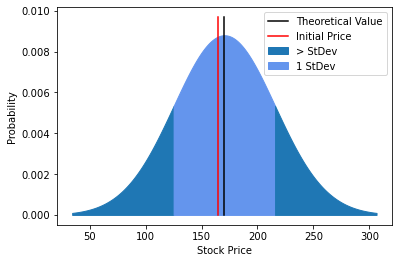

In [35]:
x12 = np.linspace(mean02-3*se02,mean02-1*se02,100)
x22 = np.linspace(mean02-1*se02,mean02+1*se02,100)
x32 = np.linspace(mean02+1*se02,mean02+3*se02,100)

s12 = stats.norm.pdf(x12, mean02, se02) 
s22 = stats.norm.pdf(x22, mean02, se02)
s32 = stats.norm.pdf(x32, mean02, se02)

plt.fill_between(x12, s12, color='tab:blue',label='> StDev') 
plt.fill_between(x22, s22, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x32, s32, color='tab:blue') 

plt.plot([mean02,mean02],[0, max(s22)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value in future
plt.plot([initial_price,initial_price],[0, max(s22)*1.1], 'r', label='Initial Price') # red line plots the initial price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot

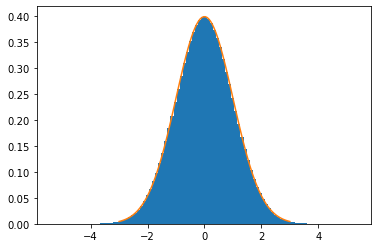

In [36]:
# Another random number, this time using the Marsaglia method. The uniform number is taken from the numpy's default uniformly distributed random number generator.
# This chunk of code is an algorithm that transforms uniformly distributed random number into normally distributed random number. 

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

start61 = time.time()

np.random.seed(500)
def f(u1, R_sq):
  return u1 * np.sqrt(-2*np.log(R_sq) / R_sq)

def sim(N):
  out = np.zeros(N)
  for i in range(N):
    R_sq = 2
    while R_sq > 1:
      u1 =  rd.uniform(-1,1) # U2[i] 
      u2 =  rd.uniform(-1,1) #U3[i]  
      R_sq = u1**2 + u2**2
    X = f(u1, R_sq)
    out[i] = X
  return out


#plot
N2 = sim(12600000)
plt.figure()
plt.hist(N2, bins=100, density=True)
xx=np.linspace(-3,3,100)
plt.plot(xx,stats.norm.pdf(xx))
Norm2 = N2

end61 = time.time()

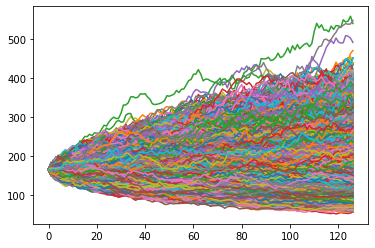

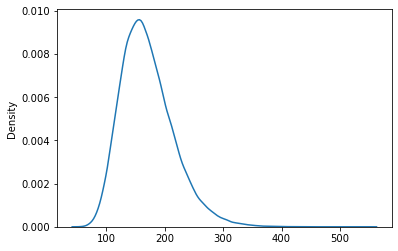

In [37]:
start62 = time.time()
M3 = 100000
N3 = 126
Z3 = np.reshape(Norm2, (N3,M3))
delta_lnSt3 = nudt + volsdt*Z3
lnSt3 = lnS + np.cumsum(delta_lnSt3, axis=0)
lnSt3 = np.concatenate( (np.full(shape=(1, M3), fill_value=lnS), lnSt3 ) )
ST3 = np.exp(lnSt3)
plt.plot(ST3)
plt.show()
final_day021 = ST3[-1]
sns.kdeplot(final_day021)
end62 = time.time()



In [73]:
mean021 = final_day021.mean()
se021 = final_day021.std()
print('The mean is:',mean021,'and the standard deviation is:',se021)

skew021 = stats.skew(final_day021)
kurtosis021 = stats.kurtosis(final_day021)
print('The skewness is:', skew021,'and the kurtosis is:', kurtosis021)

print('The maximum is:',final_day021.max(), 'and the minimum is: ',final_day021.min())

y4_true = np.random.normal(mean021,se021, size = 100000)
y4_pred = final_day021

mse4= mean_squared_error(np.sort(y4_true), np.sort(y4_pred))
rmse4 = mean_squared_error(np.sort(y4_true), np.sort(y4_pred), squared = False)
print('The mean squared error is:',mse4,'and the root mean squared error is:', rmse4)



x021 =final_day021

m021 = x021.mean() 
s021 = x021.std() 
dof021 = len(x021)-1 
confidence = 0.95

t_crit021 = np.abs(t.ppf((1-confidence)/2,dof021))

print('The 95% CI is: (',m021-s021*t_crit021/np.sqrt(len(x021)), m021+s021*t_crit021/np.sqrt(len(x021)),')') 

The mean is: 170.65565059870497 and the standard deviation is: 45.345879121968856
The skewness is: 0.8140297119756957 and the kurtosis is: 1.2014108284295277
The maximum is: 548.854046348656 and the minimum is:  55.252639986323736
The mean squared error is: 67.81133202969092 and the root mean squared error is: 8.234763629254388
The 95% CI is: ( 170.37459569072945 170.93670550668048 )


In [39]:
stats.kstest(final_day021, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [40]:
stats.anderson(final_day021)

AndersonResult(statistic=669.9522208673006, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [75]:
print ('The total computation time is:',end61-start61 + end62-start62)
print ('The time taken by random number generation is:',end61-start61 ,'and the simulation is:', end62-start62)



The total computation time is: 145.77628135681152
The time taken by random number generation is: 84.71370816230774 and the simulation is: 61.062573194503784


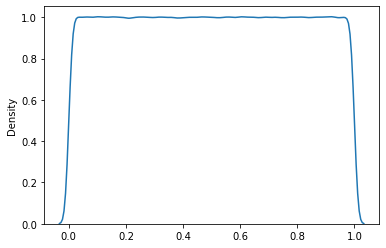

In [43]:
#Now using LCG and inversion method
start71 = time.time()
def LCG(N,S):
  a = 7**5
  M = 2**31-1

  def fn(S):
    return (a*S) % M

  U2 = []

  for k in range(N):
    S = fn(S)
    U2 += [S/M]

  return U2

U2 = LCG(12600000, 123)

sns.kdeplot(U2)
end71 = time.time()

In [44]:
from scipy.special import ndtri
start72 = time.time()
Norm3 = ndtri(U2)
end72 = time.time()

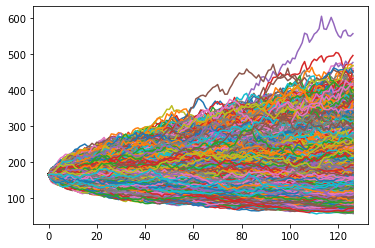

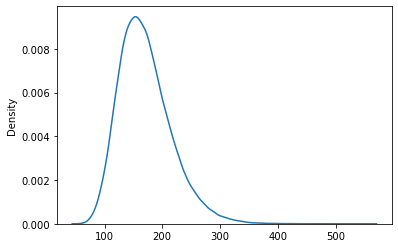

In [45]:
start73 = time.time()
M4 = 100000
N4 = 126
Z4 = np.reshape(Norm3, (N4,M4))
delta_lnSt4 = nudt + volsdt*Z4
lnSt4 = lnS + np.cumsum(delta_lnSt4, axis=0)
lnSt4 = np.concatenate( (np.full(shape=(1, M4), fill_value=lnS), lnSt4 ) )
ST4 = np.exp(lnSt4)
plt.plot(ST4)
plt.show()
final_day022 = ST4[-1]
sns.kdeplot(final_day022)
end73 = time.time()




In [77]:
mean022 = final_day022.mean()
se022 = final_day022.std()
print('The expected price is:',mean022,'and the standard deviation is:',se022)

skew022 = stats.skew(final_day022)
kurtosis022 = stats.kurtosis(final_day022)
print('The skewness is:',skew022,'and the kurtosis is:', kurtosis022)

print('The maximum is:',final_day022.max(),'and the minimum is:', final_day022.min())


y5_true = np.random.normal(mean022,se022, size = 100000)
y5_pred = final_day022

mse5= mean_squared_error(np.sort(y5_true), np.sort(y5_pred))
rmse5 = mean_squared_error(np.sort(y5_true), np.sort(y5_pred), squared = False)
print('The mean squared error is:',mse5, 'and the root mean squared error is:', rmse5)

x022 =final_day022

m022 = x022.mean() 
s022 = x022.std() 
dof022 = len(x022)-1 
confidence = 0.95

t_crit022 = np.abs(t.ppf((1-confidence)/2,dof022))

print('The 95% CI is:(',m022-s022*t_crit022/np.sqrt(len(x022)), m022+s022*t_crit022/np.sqrt(len(x022)),')') 

The expected price is: 170.54409963994175 and the standard deviation is: 45.49433528667176
The skewness is: 0.8266932309907887 and the kurtosis is: 1.259847972518422
The maximum is: 557.3257245713353 and the minimum is: 57.56273655354491
The mean squared error is: 74.52046354786941 and the root mean squared error is: 8.632523590924581
The 95% CI is:( 170.26212459689515 170.82607468298835 )


In [47]:
stats.anderson(final_day022)

AndersonResult(statistic=685.9332117617159, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [48]:
stats.kstest(final_day022, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [78]:
print('The computational time for the entire simulation is', end71-start71+end72-start72+end73-start73)
print('The uniform number generation via LCG is took',end71-start71,'seconds. The conversion to normallly distributed numbers took:',end72-start72,'seconds, and the simulation part took:',end73-start73, 'seconds')



The computational time for the entire simulation is 89.32000589370728
The uniform number generation via LCG is took 25.76106595993042 seconds. The conversion to normallly distributed numbers took: 0.788226842880249 seconds, and the simulation part took: 62.770713090896606 seconds


if possible, manually calculate the bandwidth for kde



https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b for confidence interval

In [114]:
import statsmodels.api as sm

c2 = final_day1
c1 = np.random.normal(loc = final_day1.mean() , scale = final_day1.std() , size = 10000)

dens_c = sm.nonparametric.KDEMultivariateConditional(endog=[c1], exog=[c2], dep_type='c', indep_type='c', bw='normal_reference')
dens_c.bw

array([10.0661808 , 10.36108517])